# Name: Sunil Pradhan

## Project: 2
## Project Name: Movielens Case Study
## Domain: Entertainment

### Objective

I have to perform the analysis using the Exploratory Data Analysis technique and to find features affecting the ratings of any particular movie. Building a model named Logistic Regression to predict the movie ratings



In [1]:
import numpy as np
import pandas as pd

In [2]:
#importing the datasets
movies=pd.read_csv("movies.dat", sep="::", header=None, names=['MovieID','Title','Genres'],dtype={'MovieID':np.int32, 'Title':np.str, 'Genres':np.str}, engine='python')
users=pd.read_csv("users.dat", sep="::", header=None, names=['UserID','Gender','Age','Occupation','ZipCode'],dtype={'UserID':np.int32, 'Gender':np.str, 'Age':np.int32, 'Occupation':np.str, 'ZipCode':np.str}, engine='python')
ratings=pd.read_csv("ratings.dat", sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'],dtype={'UserID':np.int32, 'MovieID':np.int32, 'Rating':np.int32, 'Timestamp':np.str},  engine='python')

In [3]:
#UserData
users.head()

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int32 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int32 
 3   Occupation  6040 non-null   object
 4   ZipCode     6040 non-null   object
dtypes: int32(2), object(3)
memory usage: 188.9+ KB


In [5]:
#checking for null values
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
ZipCode       0
dtype: int64

In [6]:
#shape of the dataframe
users.shape

(6040, 5)

In [7]:
#Movies dataset
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int32 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


In [9]:
#checking null values
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [10]:
#shape of the data frame
movies.shape

(3883, 3)

In [11]:
#rating dataset
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  int32 
 1   MovieID    1000209 non-null  int32 
 2   Rating     1000209 non-null  int32 
 3   Timestamp  1000209 non-null  object
dtypes: int32(3), object(1)
memory usage: 19.1+ MB


In [13]:
#checkinng for null values
ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [14]:
#shape of the datafreame
ratings.shape

(1000209, 4)

In [15]:
#merging users dataset and ratings dataset
users_ratings=pd.merge(users, ratings, on='UserID')
users_ratings.head()

,UserID,Gender,Age,Occupation,ZipCode,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [16]:
#merging users_ratings dataset and movies dataset
users_ratings_movies=pd.merge(users_ratings, movies, on='MovieID')
users_ratings_movies.head()

,UserID,Gender,Age,Occupation,ZipCode,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [17]:
#preparing the required master dataset
master_data=users_ratings_movies.drop(['ZipCode','Timestamp'], axis=1)

In [18]:
master_data=master_data[['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Title', 'Genres', 'Rating']]
master_data.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
1,2,M,56,16,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
2,12,M,25,12,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4
3,15,M,25,7,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4
4,17,M,50,1,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5


In [19]:
#data visualization
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [20]:
#user age distribution
age_count=users['Age'].value_counts()
age_count

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

In [21]:
age_category=('Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '55+')
x_pos=np.arange(len(age_category))
x_pos

array([0, 1, 2, 3, 4, 5, 6])

In [22]:
age_values=[age_count[1], age_count[18], age_count[25], age_count[35], age_count[45], age_count[50], age_count[56]]
age_values

[222, 1103, 2096, 1193, 550, 496, 380]

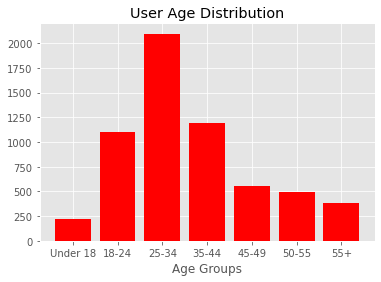

In [23]:
#plotting the bar chart
style.use('ggplot')
plt.bar(x_pos, age_values, align='center', color='r')
plt.xlabel('Age Groups')
plt.xticks(x_pos, age_category)
plt.title('User Age Distribution')
plt.show()

In [24]:
#fetching the MovieID of the Toy Story (1995)
movies[movies['Title']=='Toy Story (1995)']['MovieID']

0    1
Name: MovieID, dtype: int32

In [25]:
toystory_data=ratings[ratings['MovieID']==1]
toystory_data.head(10)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [26]:
movie_rating_toystory=toystory_data.groupby('Rating').size()
movie_rating_toystory

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [27]:
ratings_type=('1', '2', '3', '4', '5')
x_pos1=np.arange(len(ratings_type))
x_pos1

array([0, 1, 2, 3, 4])

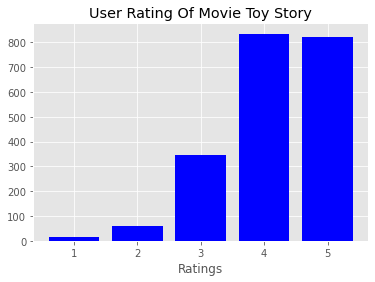

In [28]:
#plotting the barchart
style.use('ggplot')
plt.bar(x_pos1,movie_rating_toystory, align='center', color='b')
plt.xlabel('Ratings')
plt.xticks(x_pos1,ratings_type)
plt.title("User Rating Of Movie Toy Story")
plt.show()

In [29]:
#finding top 25 movies by viwership rating
#fetching the data and rating of each movie by aggregate
movie_rating=master_data.groupby(['Title'], as_index=False)
average_movie_rating=movie_rating.agg({'Rating':'mean'})
average_movie_rating

,Title,Rating
0,"$1,000,000 Duck (1971)",3.027027
1,'Night Mother (1986),3.371429
2,'Til There Was You (1997),2.692308
3,"'burbs, The (1989)",2.910891
4,...And Justice for All (1979),3.713568
...,...,...
3701,"Zed & Two Noughts, A (1985)",3.413793
3702,Zero Effect (1998),3.750831
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000
3704,Zeus and Roxanne (1997),2.521739


In [30]:
top_25=average_movie_rating.sort_values('Rating', ascending=False).head(25)
top_25

,Title,Rating
3477,Ulysses (Ulisse) (1954),5.000000
2025,Lured (1947),5.000000
1203,Follow the Bitch (1998),5.000000
407,Bittersweet Motel (2000),5.000000
3087,Song of Freedom (1936),5.000000
2453,One Little Indian (1973),5.000000
3044,Smashing Time (1967),5.000000
2903,Schlafes Bruder (Brother of Sleep) (1995),5.000000
1297,"Gate of Heavenly Peace, The (1995)",5.000000
249,"Baby, The (1973)",5.000000


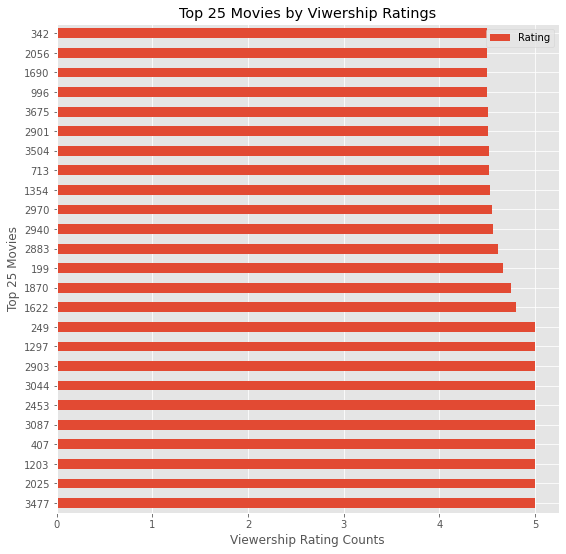

In [31]:
#plotting bar for 25 top movies by viwerership
top_25.plot(kind='barh', figsize=(9,9))
plt.xlabel("Viewership Rating Counts")
plt.ylabel("Top 25 Movies")
plt.title("Top 25 Movies by Viwership Ratings")
plt.show()

In [32]:
#rating for all the movies by a particular user of UserID=2496
user_rating_data=master_data[master_data['UserID']==2696]
user_rating_data=user_rating_data[['UserID','MovieID','Title','Rating']]
user_rating_data.head(10)

,UserID,MovieID,Title,Rating
24345,2696,1270,Back to the Future (1985),2
29848,2696,1097,E.T. the Extra-Terrestrial (1982),3
244232,2696,1617,L.A. Confidential (1997),4
250014,2696,800,Lone Star (1996),5
273633,2696,3386,JFK (1991),1
277808,2696,3176,"Talented Mr. Ripley, The (1999)",4
371178,2696,1711,Midnight in the Garden of Good and Evil (1997),4
377250,2696,1589,Cop Land (1997),3
598042,2696,1783,Palmetto (1998),4
603189,2696,1892,"Perfect Murder, A (1998)",4


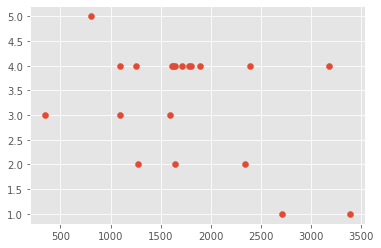

In [33]:
#plotting Movie and rating for the above particular user
plt.scatter(x=user_rating_data['MovieID'].head(20), y=user_rating_data['Rating'].head(20))
plt.show()

In [34]:
#Feature Ebgineering

In [35]:
#Finding all the unique genres
genres=master_data['Genres'].str.split("|")
genres

0                           [Drama]
1                           [Drama]
2                           [Drama]
3                           [Drama]
4                           [Drama]
                     ...           
1000204               [Documentary]
1000205                     [Drama]
1000206                     [Drama]
1000207    [Comedy, Drama, Western]
1000208               [Documentary]
Name: Genres, Length: 1000209, dtype: object

In [36]:
unique_genres=set()
for i in genres:
    unique_genres=unique_genres.union(set(i))
unique_genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [37]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0)
one_hot_genre=master_data['Genres'].str.get_dummies("|")
one_hot_genre.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [38]:
#merging one_hot_genre with master data
one_hot_genre=pd.concat([master_data,one_hot_genre], axis=1)
one_hot_genre.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,M,56,16,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,M,25,12,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,M,25,7,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,M,50,1,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#accessing all the  column names
one_hot_genre.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Title', 'Genres',
       'Rating', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [40]:
#Determine the features affecting the ratings of any particular movie.

In [41]:
feature_data=master_data.copy()
feature_data

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
0,1,F,1,10,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
1,2,M,56,16,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
2,12,M,25,12,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4
3,15,M,25,7,1193,One Flew Over the Cuckoo's Nest (1975),Drama,4
4,17,M,50,1,1193,One Flew Over the Cuckoo's Nest (1975),Drama,5
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,Modulations (1998),Documentary,5
1000205,5675,M,35,14,2703,Broken Vessels (1998),Drama,3
1000206,5780,M,18,17,2845,White Boys (1999),Drama,1
1000207,5851,F,18,20,3607,One Little Indian (1973),Comedy|Drama|Western,5


In [42]:
#fetching the year which the movie was released
feature_data[["Title","Year"]]=feature_data.Title.str.extract("(.)\s\((.\d+)", expand=True)
feature_data=feature_data.drop(['Title'], axis=1)
feature_data

,UserID,Gender,Age,Occupation,MovieID,Genres,Rating,Year
0,1,F,1,10,1193,Drama,5,1975
1,2,M,56,16,1193,Drama,5,1975
2,12,M,25,12,1193,Drama,4,1975
3,15,M,25,7,1193,Drama,4,1975
4,17,M,50,1,1193,Drama,5,1975
...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,Documentary,5,1998
1000205,5675,M,35,14,2703,Drama,3,1998
1000206,5780,M,18,17,2845,Drama,1,1999
1000207,5851,F,18,20,3607,Comedy|Drama|Western,5,1973


In [43]:
#calculating the age of movies
feature_data['Year']=feature_data.Year.astype(int)
feature_data['Movie_Age']=2022-feature_data['Year']
feature_data

,UserID,Gender,Age,Occupation,MovieID,Genres,Rating,Year,Movie_Age
0,1,F,1,10,1193,Drama,5,1975,47
1,2,M,56,16,1193,Drama,5,1975,47
2,12,M,25,12,1193,Drama,4,1975,47
3,15,M,25,7,1193,Drama,4,1975,47
4,17,M,50,1,1193,Drama,5,1975,47
...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,2198,Documentary,5,1998,24
1000205,5675,M,35,14,2703,Drama,3,1998,24
1000206,5780,M,18,17,2845,Drama,1,1999,23
1000207,5851,F,18,20,3607,Comedy|Drama|Western,5,1973,49


In [44]:
#Making gender colums to integer type
feature_data['Gender']=feature_data.Gender.replace('F',1)
feature_data['Gender']=feature_data.Gender.replace('M',0)
feature_data['Gender']=feature_data.Gender.astype(int)
feature_data

,UserID,Gender,Age,Occupation,MovieID,Genres,Rating,Year,Movie_Age
0,1,1,1,10,1193,Drama,5,1975,47
1,2,0,56,16,1193,Drama,5,1975,47
2,12,0,25,12,1193,Drama,4,1975,47
3,15,0,25,7,1193,Drama,4,1975,47
4,17,0,50,1,1193,Drama,5,1975,47
...,...,...,...,...,...,...,...,...,...
1000204,5949,0,18,17,2198,Documentary,5,1998,24
1000205,5675,0,35,14,2703,Drama,3,1998,24
1000206,5780,0,18,17,2845,Drama,1,1999,23
1000207,5851,1,18,20,3607,Comedy|Drama|Western,5,1973,49


In [45]:
#checking the correlation of features with ratings
feature_data[['Gender','Occupation','Age','Movie_Age']].corrwith(feature_data['Rating'])

Gender       0.019861
Age          0.056869
Movie_Age    0.156946
dtype: float64

In [46]:
#here movie age has the positive realtionship with rating

In [47]:
#checking Occupation relationship with Rating
occupation_rating=feature_data.groupby(['Occupation','Rating']).size().unstack()
occupation_rating

Rating,1,2,3,4,5
Occupation,,,,,
0,7892,14679,35494,44256,28178
1,4756,9054,22361,30577,18603
10,2058,2570,5392,7448,5822
11,1337,2056,4814,7287,5069
12,2578,5675,14382,20909,13670
13,405,1176,3274,5060,3839
14,2345,5160,12696,17593,11315
15,887,2271,5571,8568,5654
16,2051,4980,12355,16733,9902


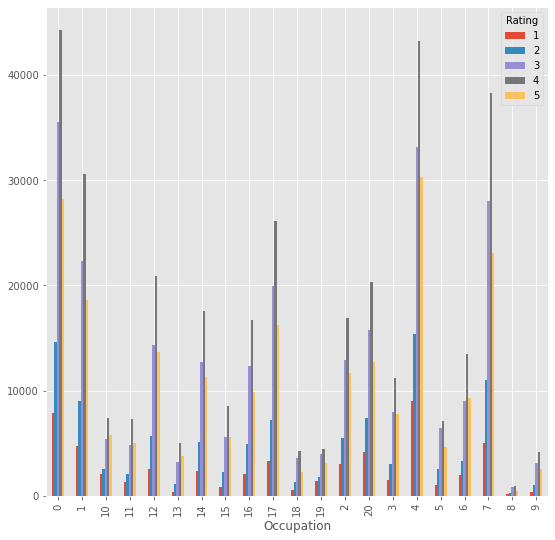

In [48]:
#plotting the graph for relationship between occupation and ratings
occupation_rating.plot(kind='bar', stacked=False, legend=True, figsize=(9,9))
plt.show()

In [49]:
#checking gender realtion with ratings
gender_rating=feature_data.groupby(['Gender','Rating']).size().unstack()
gender_rating

Rating,1,2,3,4,5
Gender,,,,,
0,42827,83009,198231,261938,167764
1,13347,24548,62966,87033,58546


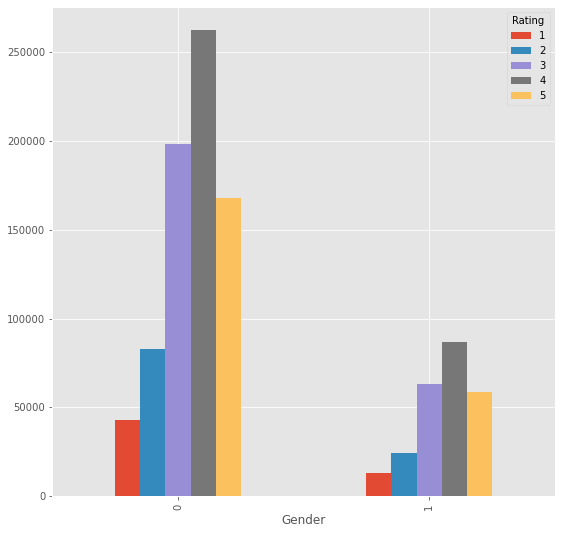

In [50]:
#plotting the graph showing realtionship between gender and ratings
gender_rating.plot(kind='bar',stacked=False, legend=True, figsize=(9,9))
plt.show()

In [51]:
#checking age realtioship with ratings
age_rating=feature_data.groupby(['Age','Rating']).size().unstack()
age_rating

Rating,1,2,3,4,5
Age,,,,,
1,2238,2983,6380,8808,6802
18,13063,22073,47601,60241,40558
25,23898,44817,104287,136824,85730
35,9067,20253,52990,71983,44710
45,3409,8437,22311,30334,19142
50,2948,5993,18465,26484,18600
56,1551,3001,9163,14297,10768


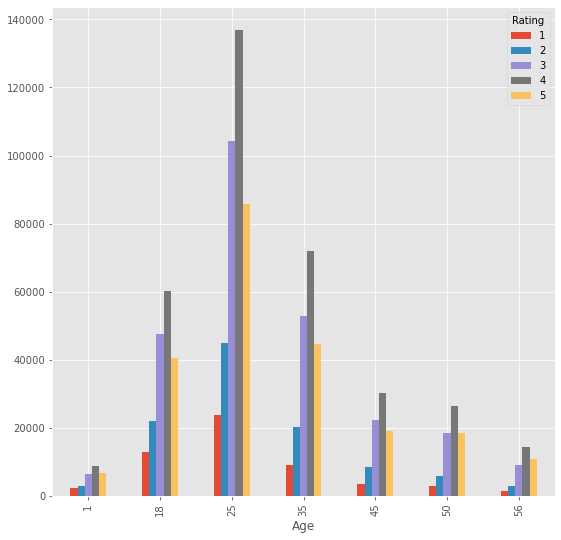

In [52]:
#plotting the graph showing relationship between age and ratings
age_rating.plot(kind='bar',stacked=False, legend=True, figsize=(9,9))
plt.show()

In [53]:
#checking relationship between movie age and ratings
movieage_rating=feature_data.groupby(['Movie_Age','Rating']).size().unstack()
movieage_rating

Rating,1,2,3,4,5
Movie_Age,,,,,
22,3551.0,5313.0,11125.0,14300.0,6711.0
23,6386.0,10704.0,22158.0,28585.0,19000.0
24,4709.0,8525.0,18751.0,23310.0,12931.0
25,4738.0,8533.0,18563.0,22204.0,11364.0
26,4540.0,8001.0,16852.0,19827.0,10162.0
...,...,...,...,...,...
99,4.0,2.0,2.0,6.0,3.0
100,12.0,10.0,42.0,78.0,96.0
101,3.0,5.0,10.0,28.0,16.0


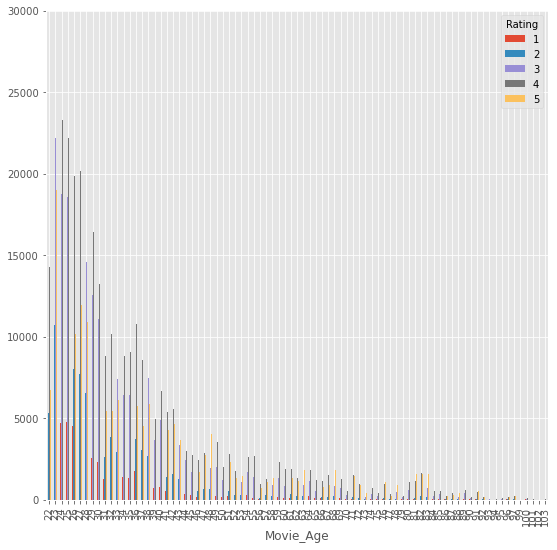

In [54]:
#plotting the graph showing the realtionship between movie_age and ratings
movieage_rating.plot(kind='bar',stacked=False, legend=True, figsize=(9,9))
plt.show()

In [55]:
#developing Logistic regression model to predict the movie rating

In [56]:
#assigning independent variable and dependent variable to Xand Y
x=master_data[['Age','Occupation','MovieID']]
y=master_data['Rating']
x
y

0          5
1          5
2          4
3          4
4          5
          ..
1000204    5
1000205    3
1000206    1
1000207    5
1000208    4
Name: Rating, Length: 1000209, dtype: int32

In [57]:
#checking the shape of x and y
x.shape

(1000209, 3)

In [58]:
y.shape

(1000209,)

In [59]:
#splitting the dataset into testing and training dataset at 70:30
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(x,y,random_state=1,test_size=0.3)

In [60]:
#using the logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [61]:
#fitting data into logistic regression
logreg.fit(x_train,y_train)

C:\Users\sssun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
#predicting the outcome using logistic regression
y_pred=logreg.predict(x_test)

In [63]:
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [64]:
#calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.3500264944361684

In [65]:
#check model perormance on new dataset
#crewate example object with new values for prediction
x_new=[[25,7,1193],[18,17,2198]]

In [66]:
logreg.predict(x_new)

array([4, 4])

In [67]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[     0      0      0  16833      0]
 [     0      0      0  31872      0]
 [     0      0      0  78277      0]
 [     0      0      0 105030      0]
 [     0      0      0  68051      0]]


C:\Users\sssun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     16833
           2       0.00      0.00      0.00     31872
           3       0.00      0.00      0.00     78277
           4       0.35      1.00      0.52    105030
           5       0.00      0.00      0.00     68051

    accuracy                           0.35    300063
   macro avg       0.07      0.20      0.10    300063
weighted avg       0.12      0.35      0.18    300063

